In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from Helper.helper import plot_boundary
from prettytable import PrettyTable

# Read data from csv file
df = pd.read_csv("./diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


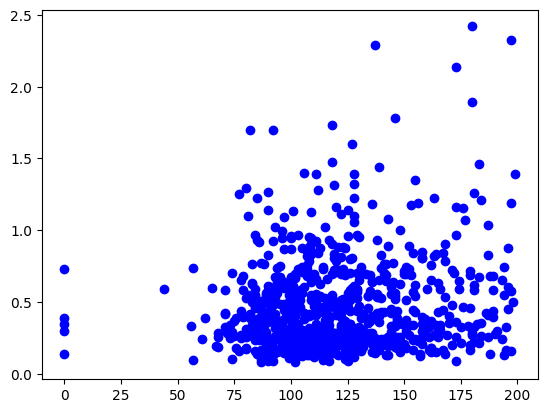

c:\Users\Ben\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Ben\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


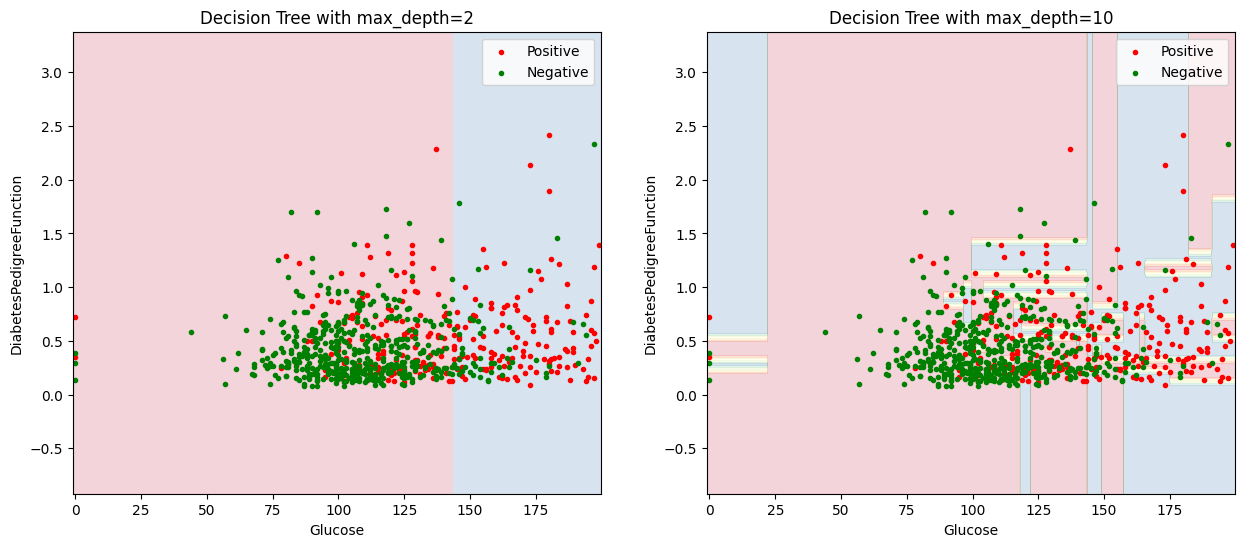

+-----------+--------------------+----------------+---------------+
| Max Depth | Number of Features | Train Accuracy | Test Accuracy |
+-----------+--------------------+----------------+---------------+
|     2     |         2          |     0.7622     |     0.7013    |
|     10    |         2          |     0.9283     |     0.6558    |
+-----------+--------------------+----------------+---------------+


In [28]:
x = df[["Glucose","DiabetesPedigreeFunction"]]
y = df["Outcome"]

test = np.array(x)

plt.scatter(test[:,0],test[:,1], color='b')
plt.show()

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

# Using Decision Tree classifier with a depth of 2
dt1 = tree.DecisionTreeClassifier(max_depth=2)
dt1.fit(x_train,y_train)

# Using Decision Tree classifier with depth of 10
dt2 = tree.DecisionTreeClassifier(max_depth=10)
dt2.fit(x_train,y_train)

plot_boundary(df, dt1, dt2)

# Testing phase
y_train_pred_dt1 = dt1.predict(x_train)
#print(classification_report(y_true= y_train, y_pred=y_train_pred_dt1))
# confusion_matrix_dt1_train = confusion_matrix(y_true=y_train, y_pred=y_train_pred_dt1)
# cmd_display_dt1_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt1_train)
# cmd_display_dt1_train.plot()

y_train_pred_dt2 = dt2.predict(x_train)
#print(classification_report(y_true= y_train, y_pred=y_train_pred_dt2))
# confusion_matrix_dt2_train = confusion_matrix(y_true=y_train, y_pred=y_train_pred_dt2)
# cmd_display_dt2_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt2_train)
# cmd_display_dt2_train.plot()

y_test_pred_dt1 = dt1.predict(x_test)
#print(classification_report(y_true= y_test, y_pred=y_test_pred_dt1))
#confusion_matrix_dt1_test = confusion_matrix(y_true=y_test, y_pred=y_test_pred_dt1)
#cmd_display_dt1_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt1_test)
#cmd_display_dt1_test.plot()

y_test_pred_dt2 = dt2.predict(x_test)
#print(classification_report(y_true= y_test, y_pred=y_test_pred_dt1))
#confusion_matrix_dt2_test = confusion_matrix(y_true=y_test, y_pred=y_test_pred_dt2)
#cmd_display_dt2_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt2_test)
#cmd_display_dt2_test.plot()

# Compute the train and test accuracy for the first decision tree classifier of depth 2
dt1_train_acc = dt1.score(x_train,y_train)
dt1_test_acc = dt1.score(x_test,y_test)

# Compute the train and test accuracy for the second decision tree classifier of depth 10
dt2_train_acc = dt2.score(x_train,y_train)
dt2_test_acc = dt2.score(x_test,y_test)

cols = df[["Glucose", "DiabetesPedigreeFunction"]].columns.to_list()
pt = PrettyTable()
pt.field_names = ['Max Depth', 'Number of Features', 'Train Accuracy', 'Test Accuracy']
pt.add_row([2, len(cols), round(dt1_train_acc, 4), round(dt1_test_acc,4)])
pt.add_row([10, len(cols), round(dt2_train_acc,4), round(dt2_test_acc,4)])
print(pt)
